In [ ]:
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout

from matplotlib import pyplot as plt

In [ ]:
(trainX, trainy), (testX, testy) = load_data()

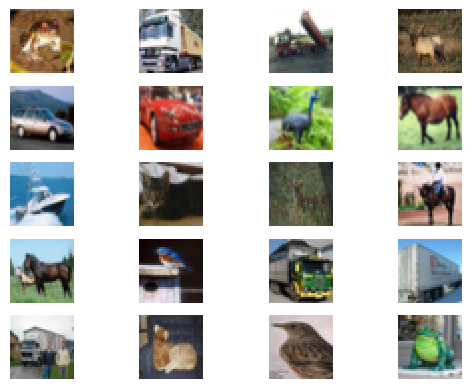

In [ ]:
for i in range(20):
  plt.subplot(5, 4, 1 + i)
  plt.axis('off')
  plt.imshow(trainX[i])
plt.show()

In [ ]:
trainX.shape[0]

50000

In [ ]:
def create_discriminator(vsr=(32, 32, 3)):
  vsr=(32, 32, 3)
  model= Sequential()
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=vsr))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same' ))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

discr = create_discriminator()
print(discr.summary())



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_35 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_36 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,361 (622.50 KB)

 Trainable params: 159,361 (622.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
def create_generator(latent_dim):
  model = Sequential()
  reqnodes = 128*8*8
  model.add(Dense(reqnodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((8, 8, 128)))
  model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(3, (8, 8), activation='tanh', padding='same'))

  return model

gen = create_generator(100)
print(gen.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 8192)                │         827,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_37 (LeakyReLU)           │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_7 (Reshape)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_14                  │ (None, 16, 16, 128)         │         262,272 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_38 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_15                  │ (None, 32, 32, 128)         │         262,272 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_39 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 3)           │          24,579 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,376,515 (5.25 MB)

 Trainable params: 1,376,515 (5.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
def create_gan(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

In [ ]:
def normalise_real_sample():
  (trainX, trainy), (testX, testy) = load_data()
  X = trainX.astype('float32')
  X = (X - 127.5)/127.5
  return X


In [ ]:
def create_real_samples(dataset, fgh):
  z = randint(0, dataset.shape[0], fgh)
  X= dataset[z]
  y=ones((fgh, 1))
  return X, y




In [ ]:
def create_latent_points(latent_dim, size):
  x_input = randn(latent_dim * size)
  x_input = x_input.reshape(size, latent_dim)
  return x_input

In [ ]:
def create_fake_samples(generator, latent_dim, size):
  x_input = create_latent_points(latent_dim, size)
  X = generator.predict(x_input)
  y = zeros((size, 1))
  return X, y

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
  jkg = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  for i in range(n_epochs):
    for j in range(jkg):
      X_real, y_real = create_real_samples(dataset, half_batch)
      d_loss_real, _ = d_model.train_on_batch(X_real, y_real)
      X_fake, y_fake = create_fake_samples(g_model, latent_dim, half_batch)
      d_loss_fake, _ = d_model.train_on_batch(X_fake, y_fake)
      X_gan = create_latent_points(latent_dim, n_batch)
      y_gan = ones((n_batch, 1))
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      print('Epoch>%d, Batch %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, jkg, d_loss_real, d_loss_fake, g_loss))
	# save the generator mode
  g_model.save('cifar_generator_2epochs.h5')





In [ ]:
latent_dim = 100
discriminator = create_discriminator()
generator = create_generator(latent_dim)
gan_model = create_gan(generator, discriminator)
dataset = normalise_real_sample()
train(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=2)


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step
Epoch>1, Batch 1/390, d1=0.692, d2=0.692 g=0.694
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step
Epoch>1, Batch 2/390, d1=0.693, d2=0.694 g=0.692
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step
Epoch>1, Batch 3/390, d1=0.694, d2=0.695 g=0.689
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step
Epoch>1, Batch 4/390, d1=0.696, d2=0.697 g=0.687
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
Epoch>1, Batch 5/390, d1=0.698, d2=0.700 g=0.683
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step
Epoch>1, Batch 6/390, d1=0.700, d2=0.702 g=0.680
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step
Epoch>1, Batch 7/390, d1=0.702, d2=0.704 g=0.675
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step
Epoch>1, Batch 8/390, d1=0.704, d2=0.707 g=0.670
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step
Epoch>1, Batch 9/390, d1=0.707, d2=0.711 g=0.664
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step
Epoch>1, Batch 10/390, d1=0.710, d2=0.715 g=0.658
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
Epoch>1, Batch 11/390, d1=0.715, d2=0.720 g=0.650
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28

In [56]:
from keras.models import load_model
from numpy.random import randn


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


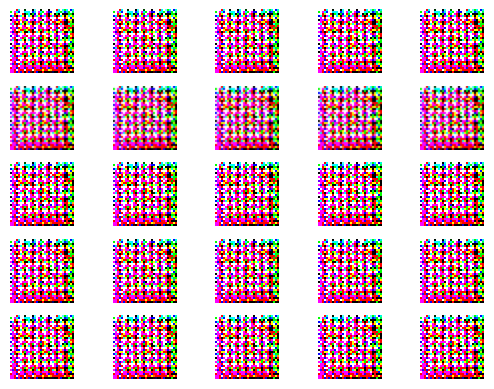

In [57]:
def show_plot(examples, n):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, :])
	plt.show()

# load model
model = load_model('cifar_generator_2epochs.h5') #Model trained for 100 epochs
# generate images
latent_points = create_latent_points(100, 25)  #Latent dim and n_samples
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

import numpy as np
X = (X*255).astype(np.uint8)

# plot the result
show_plot(X, 5)
